In [1]:
import networkx as nx
import pickle

Specify pickle file location here (of graph object list and properties list)

In [2]:
savelocG=r"sliced_data/connected_cavemen_graphs_first_50.pickle"
savelocP=r"sliced_data/connected_cavemen_properties_first_50.pickle"

In [3]:
with open(savelocG, "rb") as input_file:
    graphs = pickle.load(input_file)
    print(len(graphs))
with open(savelocP, "rb") as input_file:
    properties = pickle.load(input_file)
    print(len(properties))

50
50


Means we have 50 graph objects and corresponding 50 vectors with properties for each graph

Lets see the SECOND graph and its properties

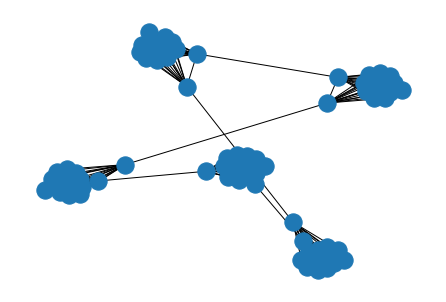

In [4]:
nx.draw(graphs[2])

In [5]:
print(properties[2])

[7.50000000e+01 5.25000000e+02 1.40000000e+01 1.89189189e-01]


[number of nodes, number of edges, avg_degree, density]

# Example of LCS and graphing

Need to install netgraph

In [6]:
#!pip install netgraph

In [7]:
from networkx.algorithms import community
from netgraph import Graph
import matplotlib.pyplot as plt

In [10]:
clustering=community.label_propagation_communities(graphs[2])
print(clustering)

dict_values([{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}, {15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}, {32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 30, 31}, {45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59}, {64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 60, 61, 62, 63}])


Outer loop: Iterate over the communities

Inner loop: Iterate over nodes in each community

node_to_community dictionary stores which node belongs to which community

In [11]:
node_to_community = dict()
com_id=0
for cluster in clustering:
    for node in cluster:
        node_to_community[node]=com_id
        
    com_id+=1

C:\Users\sqbis\AppData\Local\Programs\Python\Python39\lib\site-packages\netgraph\_edge_layout.py:761: RuntimeWarning: invalid value encountered in true_divide
  displacement = compatibility * delta / distance_squared[..., None]


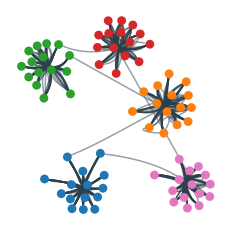

In [12]:
community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
    4 : 'tab:pink'
}
node_color = {node: community_to_color[community_id] for node, community_id in node_to_community.items()}

Graph(graphs[2],
      node_color=node_color, node_edge_width=0, edge_alpha=0.5,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled'
)

plt.show()